<a href="https://colab.research.google.com/github/jamil-wittmann/Wittmann_BIX_F21/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mechanistic Foraging
Foraging behavior is ubiquitous, it’s performed by many different animals in many different contexts. 

https://streamable.com/cq2p7v

Here we see the rat drop a slice of pizza and it’s standing there looking back while making a decision or “asking,” “Should I go back for the food?”  “Is this risky?” “Should I move on and find other food in the environment?” 

Although the video is "cute" and kind of a meme, all of these questions or thoughts lead back to the central idea of foraging decisions and behaviors.


*   It takes into account a reward system   (How satiated am I?)
*It factors spatial memory in terms of whether or not to go back to other known food sites
*Threat in the environment

Foraging is a fundamental task that animals need to perform which makes it ecologically relevant. With that we can start to ask “How do environmental factors affect neural processing and decision-making?”

I’ll answer that by drawing from the work of Jacob D. Davidson who is  a theoretical biologist that does work on decision-making of animal groups. As well as Ahmed El Hady, who is a Researcher at Princeton Neuroscience Institute, and has published a lot of work regarding foraging + more.

The basis of this project stems from a paper that these two have published titled “Foraging as an evidence accumulation process.” In this paper, they’ve created a mechanistic model. That model depicts foraging decisions via evidence accumulation. 

(mechanistic model - a theory to predict what will happen in the real world)

The problem we’re considering is the patch-leaving problem. The question being, “When is it a good time to leave one resource patch in search of another?"


## Agents
In the classic example, we utilize the marginal value theorum to predict optimal behavior. This project expands on that idea by implementing other frameworks that gets us closer to "ecological rationality" rather than a pure "economic rationality." We will expand on this "The TED talk moment" section.

## Environment
The environment isn’t necessarily specific. In its simplest form, it’s a world populated by patches of food where an agent attempts to traverse the environment to maximize reward (food) over time. For example, please see the rudimentary depiction below. 

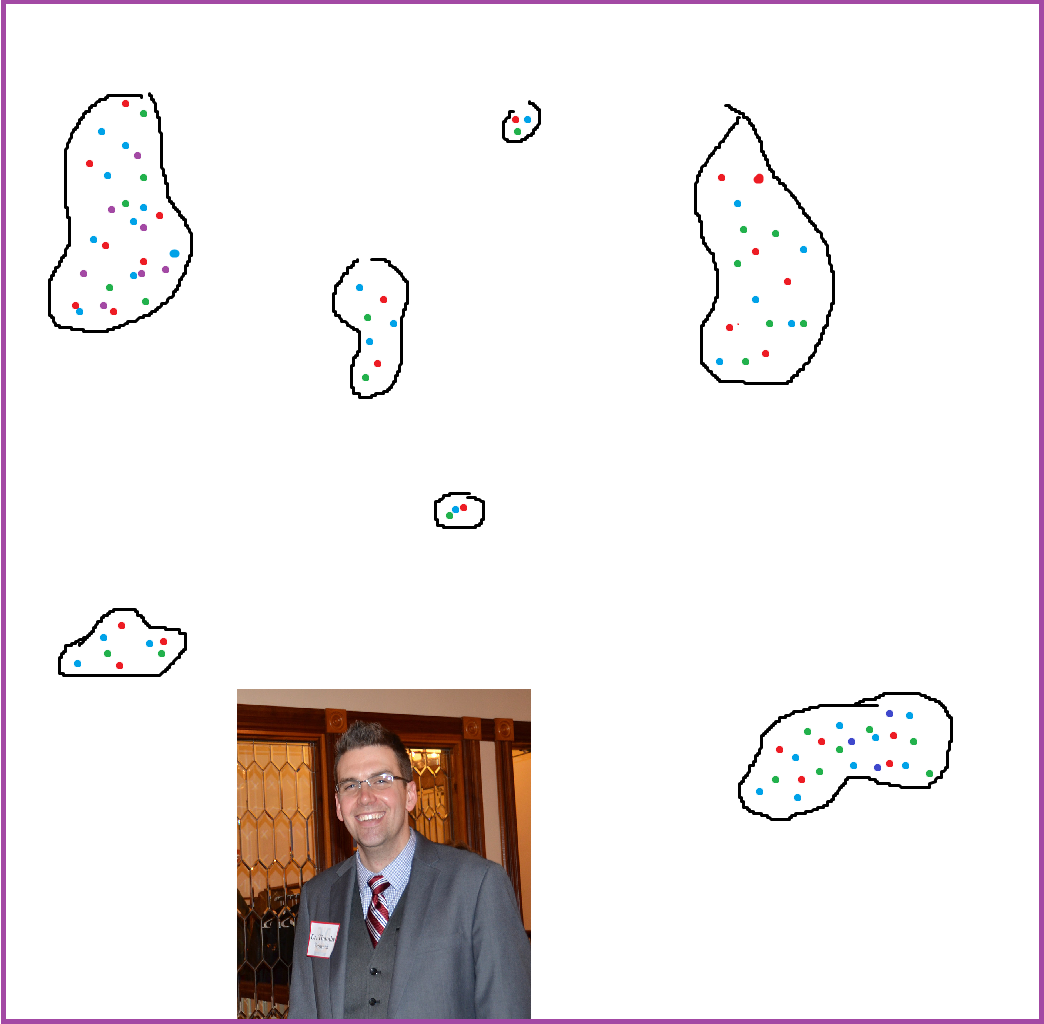



In the real world this may take the form of brown bears searching for berry patches, bees foraging for pollen and nectar from flowers, or even a New York City rat looking for a slice of pizza. 

From the classic environment, we can observe a few enviromental variables such as:

*   Resources gained (food intake)
*   The time spent within the patch 
*  Between patch effort (travel time)

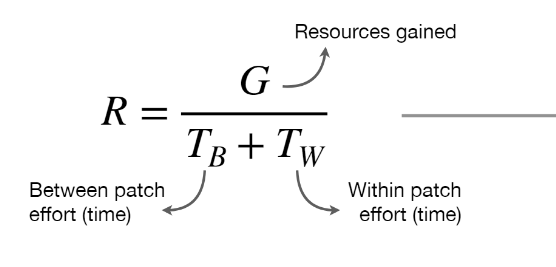

## Goals
 What is the optimal patch-leaving strategy in a continuous environment? Continuous environment meaning an environment where patch sizes are unknown, finite, and can be arbitrarily large.

I hypothesize that the optimal strategy in a continuous environment would be one that resembles the marginal value theory. Conversely, in a discrete environment, this would not be the case.

## Sections
- _Section 1_ is a explaining what the foraging drift diffusion model is.
- _Section 2_ is a illustrating the foraging drift diffusion model.
- _Section 3_ explains what the optimal strategy is in a continuous environment.

## Metric
Our metrics of interest are decision threshold and drift rate.

## The TED talk moment
There’s been a lot of publications and work surrounding the patch-leaving problem. For example, we’ve previously discussed in lecture an optimal solution, or a close to optimal solution, to this problem through the marginal value theorem. This states that we can optimize reward by leaving a patch when reward rate reaches the overall average for the environment. But there’s a fundamental issue with using the marginal value theorem to describe a complex behavior such as foraging. In its nature, the marginal value theorem depends on economic rationality rather than ecological rationality. Essentially, MVT provides us with a predictive rule as to when an animal should leave a patch but it doesn’t take into account your experience of gaining rewards and your experience within a patch to decide when you should leave a patch. 
 
By adding other relevant ideas from different frameworks to the marginal value theorem we can better understand and model how certain strategies change with the environment and how animals may implement different strategies.

Some of these added frameworks include:


*   Patch depletion with discrete rewards (MVT considers continuous rewards)
*   Estimating the available energy in the environment
*   Mechanistic account of patch leaving (MVT provides us with a predictive rule as to when an animal should leave a patch but it doesn’t take into account an array of experiences and other variables within the enviroment. We neglect real world behavior if we strictly use the MVT.) 

We can implement some of the ideas from these frameworks on top of utilizing MVT and start to compose the “Foraging drift diffusion model.”


## Install and import needed modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions_simulation as sim
import fokkerplancksol as fpsol
snscolors=sns.color_palette() 

## Section 1 - The foraging drift diffusion model.
Here we address enviromental parameters and break down the foraging drift diffusion model.

Addressing the environmental parameters:

We have a patch (ρ0) that has a food or reward size of c. As c goes to zero it depicts continuous rewards. As c increases it would be more discrete. The size of the patch, A (area), has an initial density of food. The travel time between patches is Ttr. Time within is Tp

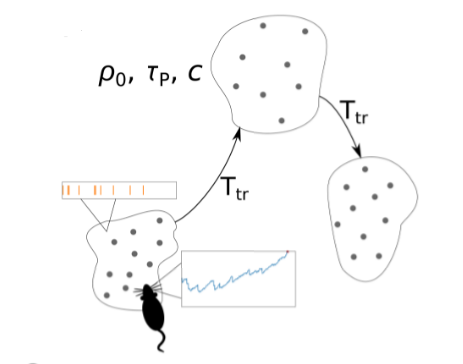

"
Schematic showing the patch-leaving task: A forager estimates the average rate of reward from the environment, and the decision to leave a patch occurs when the internal decision variable reaches a threshold."


Two equations that describe the foraging drift diffusion model: the estimate of available energy & the decision to leave a patch

Estimate of available energy: 
equation 1.png

Moving average of the energy in the enviroment. This is the direct experience of the reward that animals get with a metabolic cost. 

"The first is an averaging process to estimate the available energy in the environment. The forager receives rewards according to a time-dependent reward function r(t), which is zero when outside of a patch. There is a constant cost of s, so that the net rate of energy gain while in a patch is r(t) − s, and while traveling between patches it is −s. With this information, the energy intake available from the environment (E) is estimated by taking a moving average over a timescale τE:"

Decision to leave a patch: equation 2.png

This depicts a drift diffusion process. 

"The second equation provides a mechanistic description of when to leave an individual patch based on the actual experience of rewards. Motivated by models of decision-making, we represent this using a drift-diffusion process via a patch decision variable x. Upon entering a patch x = 0, and changes in x occur with evidence accumulation from a constant drift α and time-dependent rewards r(t). The forager decides to leave the patch when the threshold of x = η is reached."

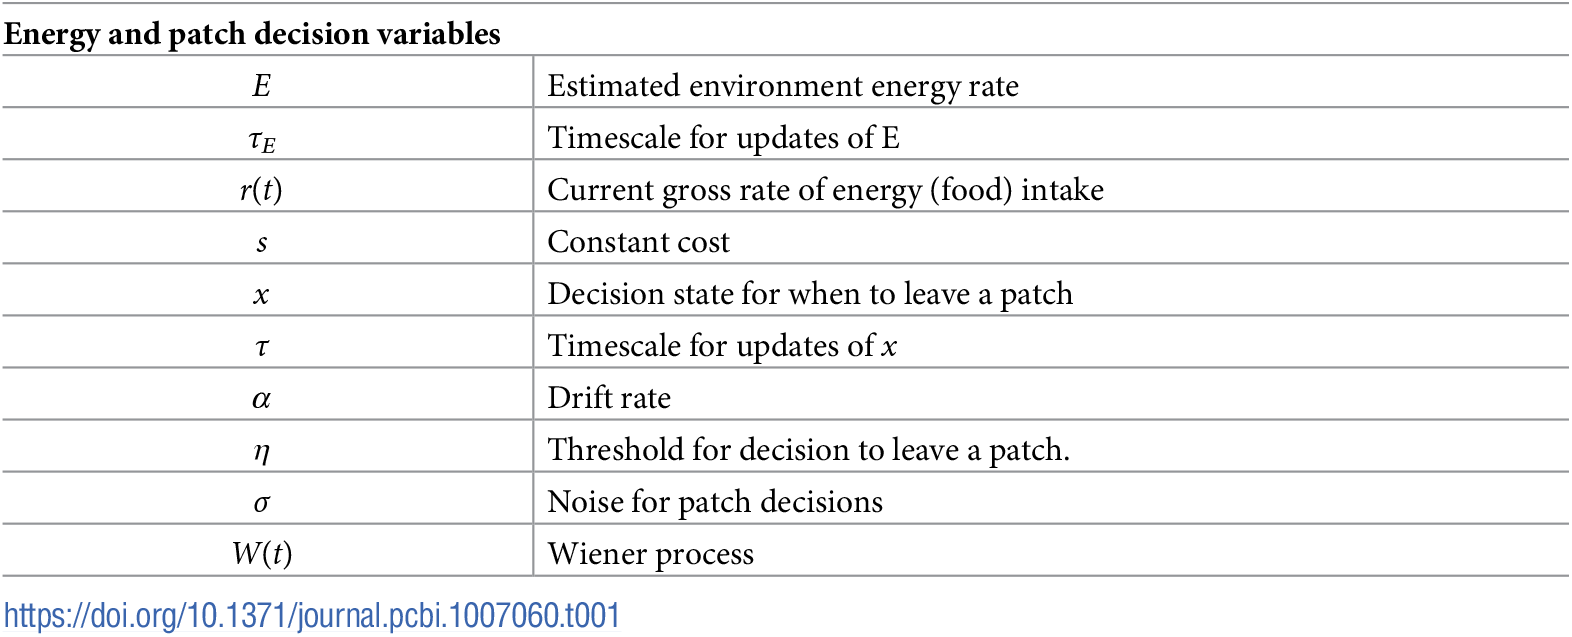

## Section 2 - The foraging drift diffusion model in action. (Plot)
In this section we <..._Summary of this section's goals_...>. I want to show that <....>

In [ ]:
# Simulation parameters
dt=0.01  # remember that if use a finer mesh, need to use a smaller time step!
totaltime=50  # this is the maximum number of time steps, and also the amount of time for which that patch rewards are generated
numsteps=np.round(totaltime/dt).astype(int)

# Set environment, patch, and model parameters
Evalue = 2
tau_patch = 5
Ttravel=5
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
print('rho0=',rho0) 
sigma=0.3*rho0
chunksize=4  # how big the chunk sizes are.  0 is continuous reward, larger values mean fewer, larger reward pieces
alpha=1*rho0  # example in the paper uses the density-adaptive strategy, i.e. alpha=1*rho0

# solve for threshold value, and generate rewards
eta = sim.eta_opt(Evalue,rho0,tau_patch,alpha)
etalist=np.ones(numsteps)*eta  # will use this to pass into FP solution... in this case, it is constant
allreward, _  = sim.generate_patch_rewards(chunksize,rho0,tau_patch,numsteps,dt=dt)

# Fokker Planck class:  initialize and get solution
numelements=51 # note!  needs to be an odd number
fp = fpsol.FPsolution(n=numelements) # initialize the class
allH, allG = fp.getsolution(allreward,etalist,alpha,sigma,dt,threshold=0.01)  # get solution

# some calculations for plotting
times=np.arange(numsteps)*dt
Texpected = np.sum(np.diff(1-allH)*times[1:])  # Expected patch residence time


rho0= 9.438579661861747
reached threshold


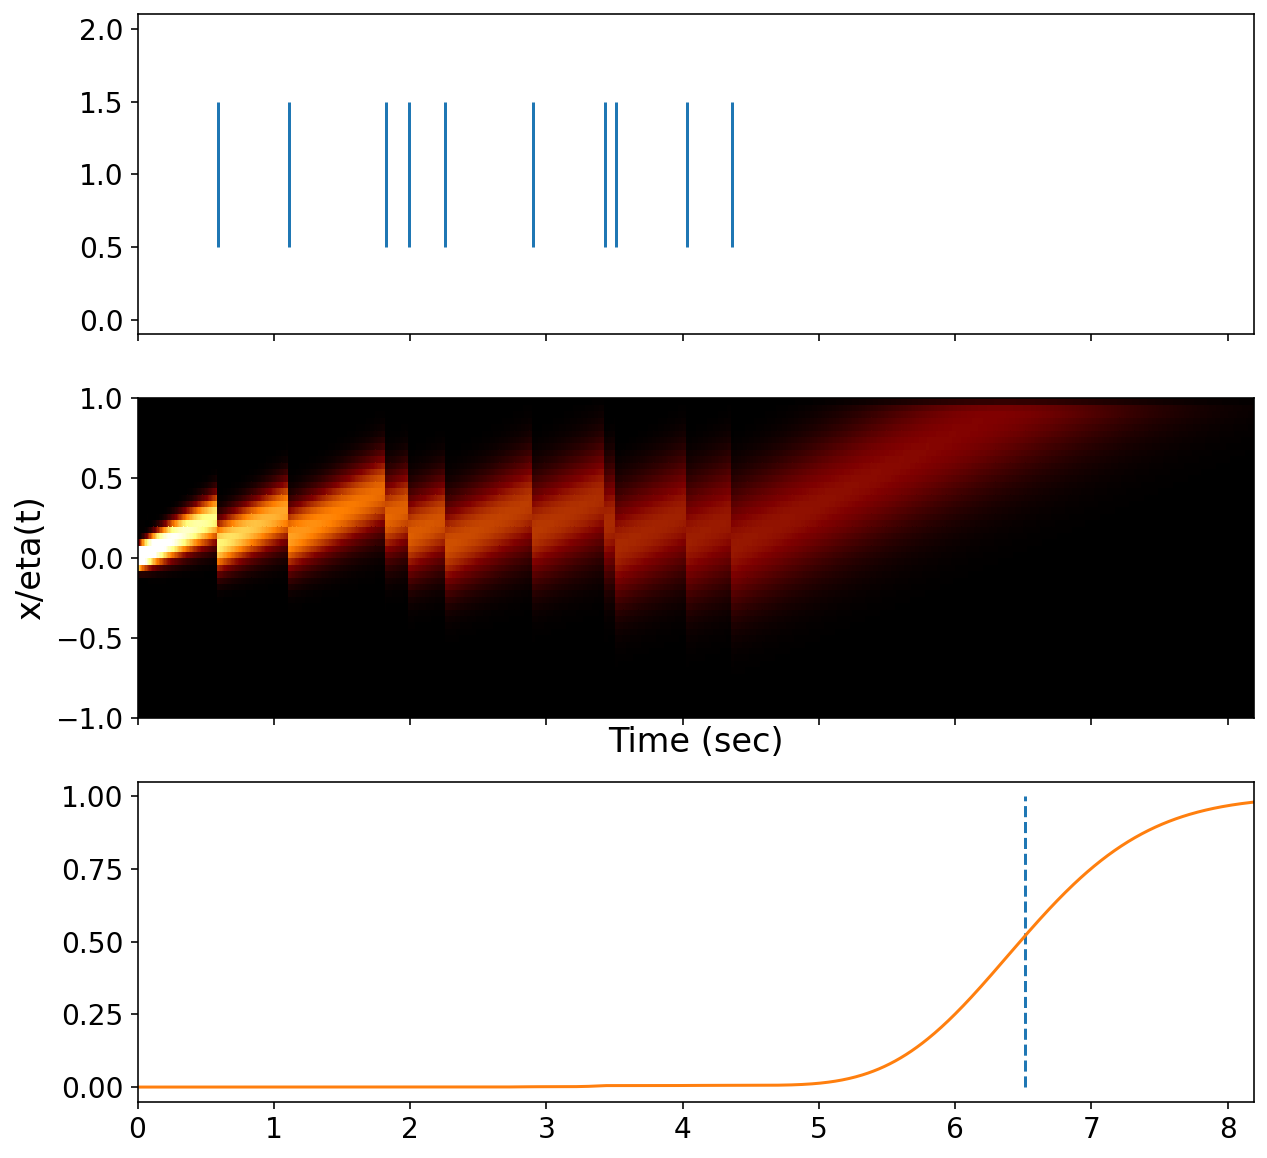

In [ ]:
## PLOT RESULTS
f,ax = plt.subplots(3,1,sharex=True)
f.set_size_inches(10,10)
lsize=14

ax[0].eventplot(times[allreward>0])
ax[0].set_xlim([0,times[allH<0.02][0]])
ax[0].tick_params(labelsize=lsize)

x=np.tile(times,(numelements,1)).T
y=np.tile(fp.mesh,(numsteps,1))
z=(allG[:,0:-1]+allG[:,1:])/2  # Plot the "element values", as the mean of the nodal values
ax[1].pcolormesh(x, y, z, cmap='afmhot',vmin=0,vmax=5,rasterized=True)
ax[1].set_xlabel('Time (sec)',fontsize=1.2*lsize)
ax[1].set_ylabel('x/eta(t)',fontsize=1.2*lsize)
ax[1].tick_params(labelsize=lsize)

ax[2].plot([Texpected,Texpected],[0,1],'--')
ax[2].plot(times,1-allH)
ax[2].tick_params(labelsize=lsize)
plt.show()

### Explaining this...
**The first plot:**

Every blue line depicts receiving a reward thus reducing the patch decision variable.

**The second plot:**

The Y-axis is the patch decision variable and when we reach a threshold we decide to leave a patch. Included in this, we have a drift rate (α) and noise (σ) which grows overtime. So as time increases, we drift towards the decision threshold (1) while food rewards bring down the patch decision variable. 

In layman’s terms, we are constantly moving towards a decision threshold due to drift rate, however everytime we find food in a specific patch we decrease the patch decision variable meaning that we want to stay in the patch. Once we reach  patch decision variable = 1, we move onto the next patch. 


**The third plot: **

The moment in which we reach the decision threshold to move to another patch. 



##Section 3 - Optimal strategy in a continuous environment.

In section 1, we have environmental parameters, but we also have a drift rate and a threshold. So how do we set these parameters? Using an approximation of the average energy, we can solve for a relationship between the threshold and the drift rate which results in optimal decision making. This relationship is plotted below and is a linear relationship in terms of the environmental variables. When this relationship is satisfied, the decisions will always be optimal according to the marginal value theorem. 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

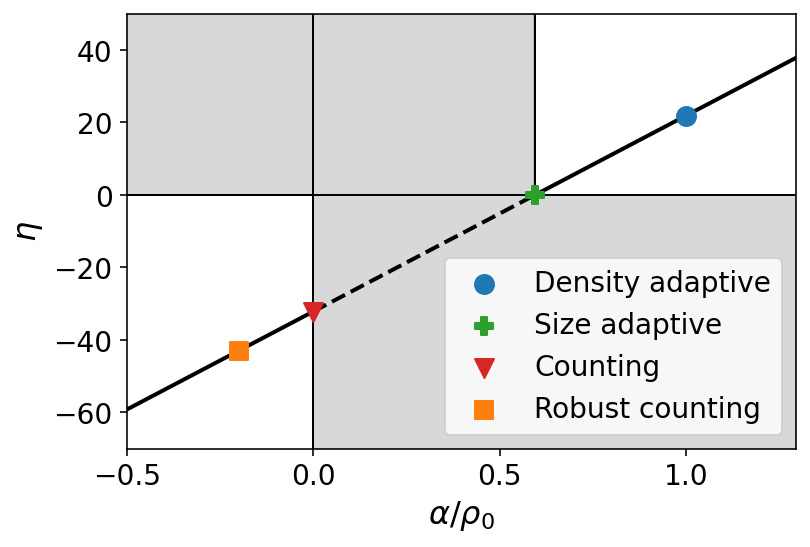

In [ ]:
strategynames = ['Density adaptive','Size adaptive','Counting','Robust counting']
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
alphasize = sim.alpha_opt(Evalue,rho0,tau_patch)/rho0
alphachoicevalues=[1,alphasize*1.05,0,-0.2]

dalpha=0.01
alphanegative = np.arange(-0.5,0,dalpha)
alphanotused = np.arange(0,alphasize,dalpha)
alphapositive = np.arange(alphasize,1.3,dalpha)
xmin, xmax = [np.min(alphanegative),np.max(alphapositive)]
alleta = [sim.eta_opt(Evalue,rho0,tau_patch,alpha=rho0*a) for a in [alphanegative,alphanotused,alphapositive]]  # the threshold used

lw = 2.0
plt.plot(alphanegative,alleta[0],'k',linewidth=lw)
plt.plot(alphanotused,alleta[1],'k--',linewidth=lw)
plt.plot(alphapositive,alleta[2],'k',linewidth=lw)
plt.xlim([xmin,xmax])

plt.xlabel('$\\alpha/\\rho_0$',fontsize=16)
plt.ylabel('$\eta$',fontsize=16)


ymin = -70
ymax = 50
plt.ylim([ymin,ymax])

[plt.vlines(x=xval,ymin=ymin,ymax=ymax,linewidth=1.0) for xval in [0]]
plt.hlines(y=0,xmin=xmin,xmax=xmax,linewidth=1.0)
plt.vlines(x=alphasize,ymin=0,ymax=50,linewidth=1.0)
#plt.axvspan(0,alphasize, alpha=0.5, color='grey')
#plt.axvspan(-0.5,0,ymin=-ymin/(ymax-ymin),ymax=1, alpha=0.5,color='grey')
#plt.axvspan(alphasize,1.3,ymin=0,ymax=-ymin/(ymax-ymin), alpha=0.5,color='grey')
plt.axhspan(0,50,xmin=0,xmax=(0.5+alphasize)/1.8,alpha=0.3,color='grey')
plt.axhspan(-70,0,xmin=(0.5)/1.8,xmax=1,alpha=0.3,color='grey')


alphachoice_tp=[1,alphasize,0,-0.2]
etachoice = [sim.eta_opt(Evalue,rho0,tau_patch,alpha=rho0*a) for a in alphachoice_tp]  # the threshold used

styles=['o','P','v','s']
cnum=[0,2,3,1]
for i in range(4):
    plt.scatter(alphachoice_tp[i],etachoice[i],zorder=10,s=90,c=snscolors[cnum[i]],marker=styles[i],label=strategynames[i])
plt.tick_params(labelsize=lsize)
plt.legend(fontsize=14)
plt.show()

We can chose the drift rate (α) and the threshold (η) (eta) along the solid line in the plot. The blue point depicts an increment-decrement strategy where α > 0 and η ≥ 0. While the yellow point depicts a decremental strategy where α ≤ 0 and η < 0. These strategies are explained in detail below. 


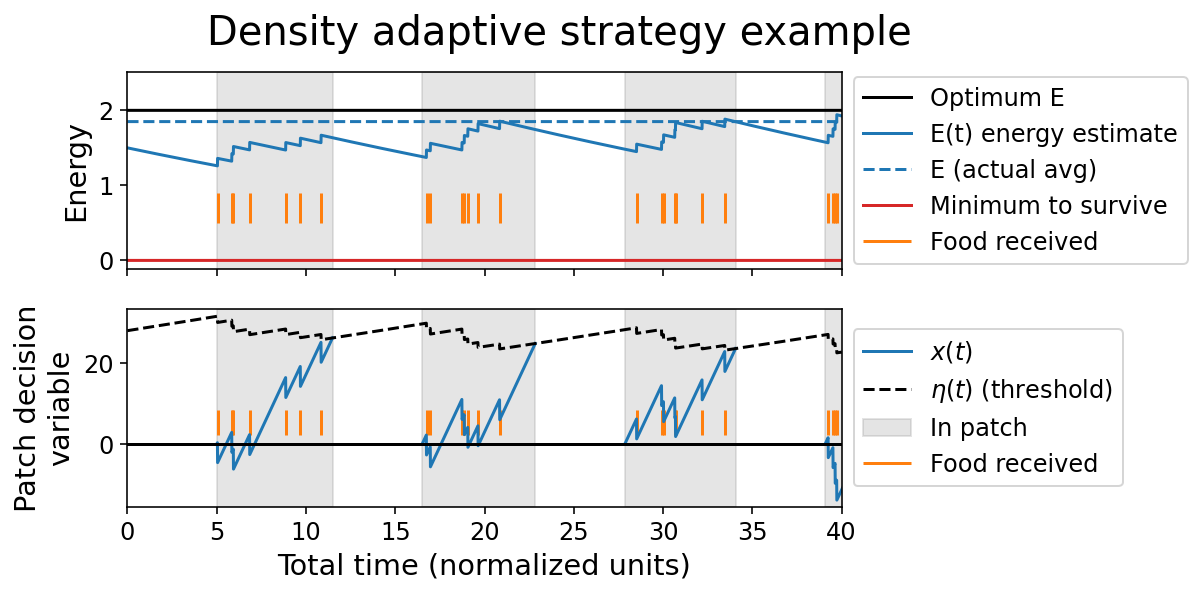

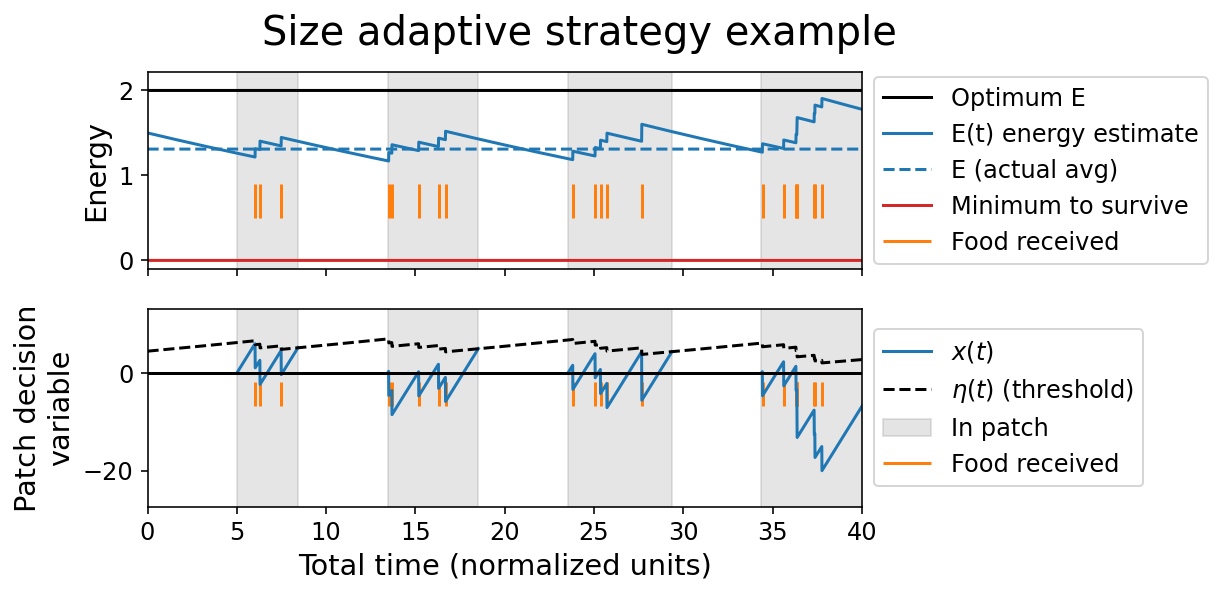

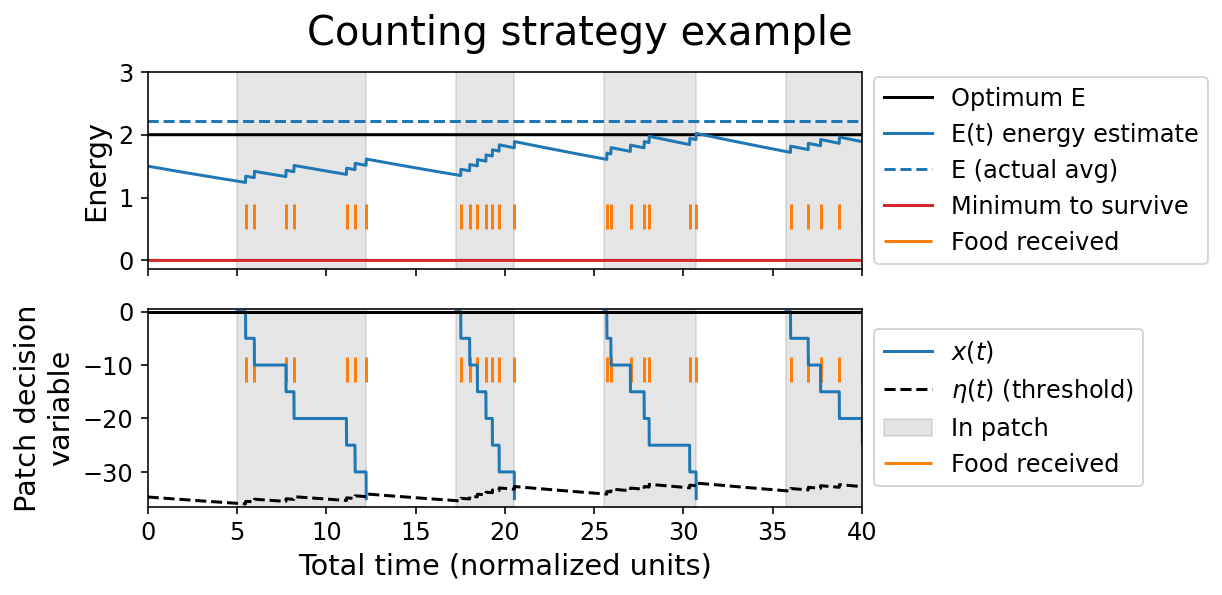

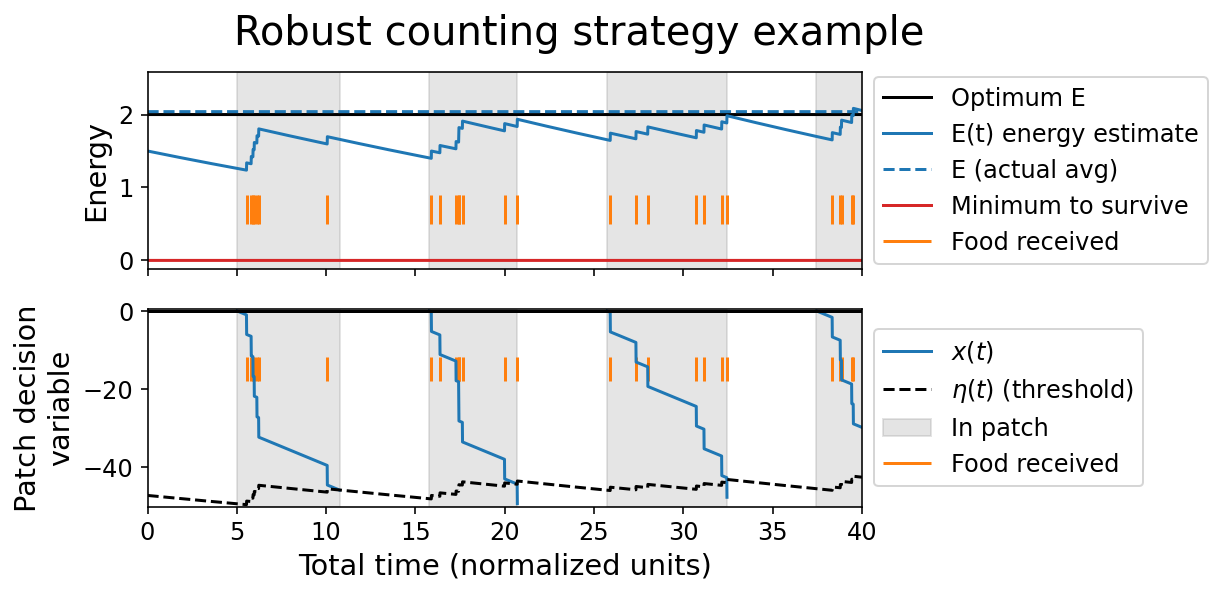

In [ ]:
Evalue = 2
tau_patch = 5
Ttravel=5



##############################################################################################################################
strategynames = ['Density adaptive','Size adaptive','Counting','Robust counting']
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
alphasize = sim.alpha_opt(Evalue,rho0,tau_patch)/rho0
alphachoicevalues=[1,alphasize*1.05,0,-0.2]

E0mult=0.75  # for initializing the energy estimate

sim.totaltime=500

sigmavalue=0
chunksize=5

for snum in range(4):  # strategy number
    alphachoice=alphachoicevalues[snum]
    allE, allEactual, allx, patchsteps, travelsteps, _ = sim.modelsimulation(totaltime=sim.totaltime, dt=sim.dt, # time in seconds
                        tau_E=sim.tau_E, Ttravel=Ttravel, rho0=rho0, tau_patch=tau_patch, 
                        beta=0, sigma=sigmavalue*rho0, sigma_rho0=0.0*rho0, sigma_taupatch=0.0*tau_patch, 
                        sigma_Ttravel=0,
                        q=chunksize,
                        alphachoice=alphachoice,
                        E0mult=E0mult,
                        timetrace=True)

    meanEactual = np.mean(allEactual)
    alleta = sim.eta_opt(allE,rho0,tau_patch,alpha=rho0*alphachoice)  # the threshold used

    numpatches=3
    lsize=12
    plotrange=[0,(patchsteps[numpatches-1][1])*sim.dt+2]
    plotrange=[0,40]
    numsteps=len(allE)
    timevalues=np.arange(0,numsteps)*sim.dt

    f,ax=plt.subplots(2,1,sharex=True)
    f.set_size_inches(8,4)
    for k in range(len(patchsteps)):
        ax[0].axvspan((patchsteps[k][0]-1)*sim.dt, (patchsteps[k][1]-0)*sim.dt, alpha=0.2, color='gray')
    ax[0].plot(timevalues,np.ones(numsteps)*Evalue,label='Optimum E',color='k')
    ax[0].plot(timevalues,allE,label='E(t) energy estimate',color=snscolors[0])
    ax[0].plot(timevalues,meanEactual*np.ones(numsteps),'--',label='E (actual avg)',color=snscolors[0])
    ax[0].set_ylabel('Energy',fontsize=1.2*lsize)
    ax[0].set_xlim(plotrange)
    if chunksize>0:
        ax[0].eventplot(timevalues[allEactual>0],color=snscolors[1],linelengths=0.4,lineoffsets=0.7,label="Food received")
    ax[0].plot(timevalues,np.zeros(numsteps),label='Minimum to survive',color=snscolors[3])

    for k in range(len(patchsteps)):
        t0=patchsteps[k][0]
        t1=patchsteps[k][1]+1
        if k==0:  # add a legend entry, but only do it once
            ax[1].axvspan((patchsteps[k][0]-1)*sim.dt, patchsteps[k][1]*sim.dt, alpha=0.2, color='gray',label='In patch')
            ax[1].plot(timevalues[t0:t1],allx[t0:t1],color=snscolors[0],label='$x(t)$')                    
        else:
            ax[1].axvspan((patchsteps[k][0]-1)*sim.dt, (patchsteps[k][1])*sim.dt, alpha=0.2, color='gray')
            ax[1].plot(timevalues[t0:t1],allx[t0:t1],color=snscolors[0])      

    ax[1].plot(timevalues,alleta,'k--',label='$\eta(t)$ (threshold)')    
    ax[1].set_xlabel('Total time (normalized units)',fontsize=1.2*lsize)
    ax[1].set_ylabel('Patch decision\nvariable',fontsize=1.2*lsize)
    ax[1].axhline(y=0, color='k')
    if np.max(alleta)>0:
        ylim=[np.min(allx),np.max(alleta)+0.5]
        ax[1].set_ylim(ylim)
    else:
        ylim = [np.min(alleta)-0.5,np.max(allx)+0.5]
        ax[1].set_ylim(ylim)
    if chunksize>0:
        ax[1].eventplot(timevalues[allEactual>0],color=snscolors[1],linelengths=np.abs(np.diff(ylim))/8,lineoffsets=0.6*np.mean(ylim),label="Food received")    
    # create the legends for both
    # Shrink current axis by 20%, then put legend tothe right
    for ax in ax:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=lsize)
        ax.tick_params(labelsize=lsize)
    plt.suptitle(strategynames[snum]+' strategy example',fontsize=20)
    plt.show()

Focusing on plots 1 & 4, plot 1 depicts an increment-decrement strategy. While plot 4 depicts a decrimental strategy. 

An increment-decrement strategy means that the drift rate is always moving towards the decision threshold, while receiving reward moves us away from the threshold. This is essentially the strategy shown and explained in Section 2. Receiving reward makes it more likely that we stay within the patch.

A decremental strategy means that we have a negative threshold. We flip the signs. So we still drift towards the threshold but the key difference here is that food reward pushes us towards the threshold. Receiving reward makes it more likely to leave the patch. 

Although both strategies differ in how food reward influences the decision to stay in a patch, they both can achieve optimal energy intakes.  

An increment-decrement strategy is optimal when the amount of food in a patch is unknown. 


env  0
env  1
env  2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


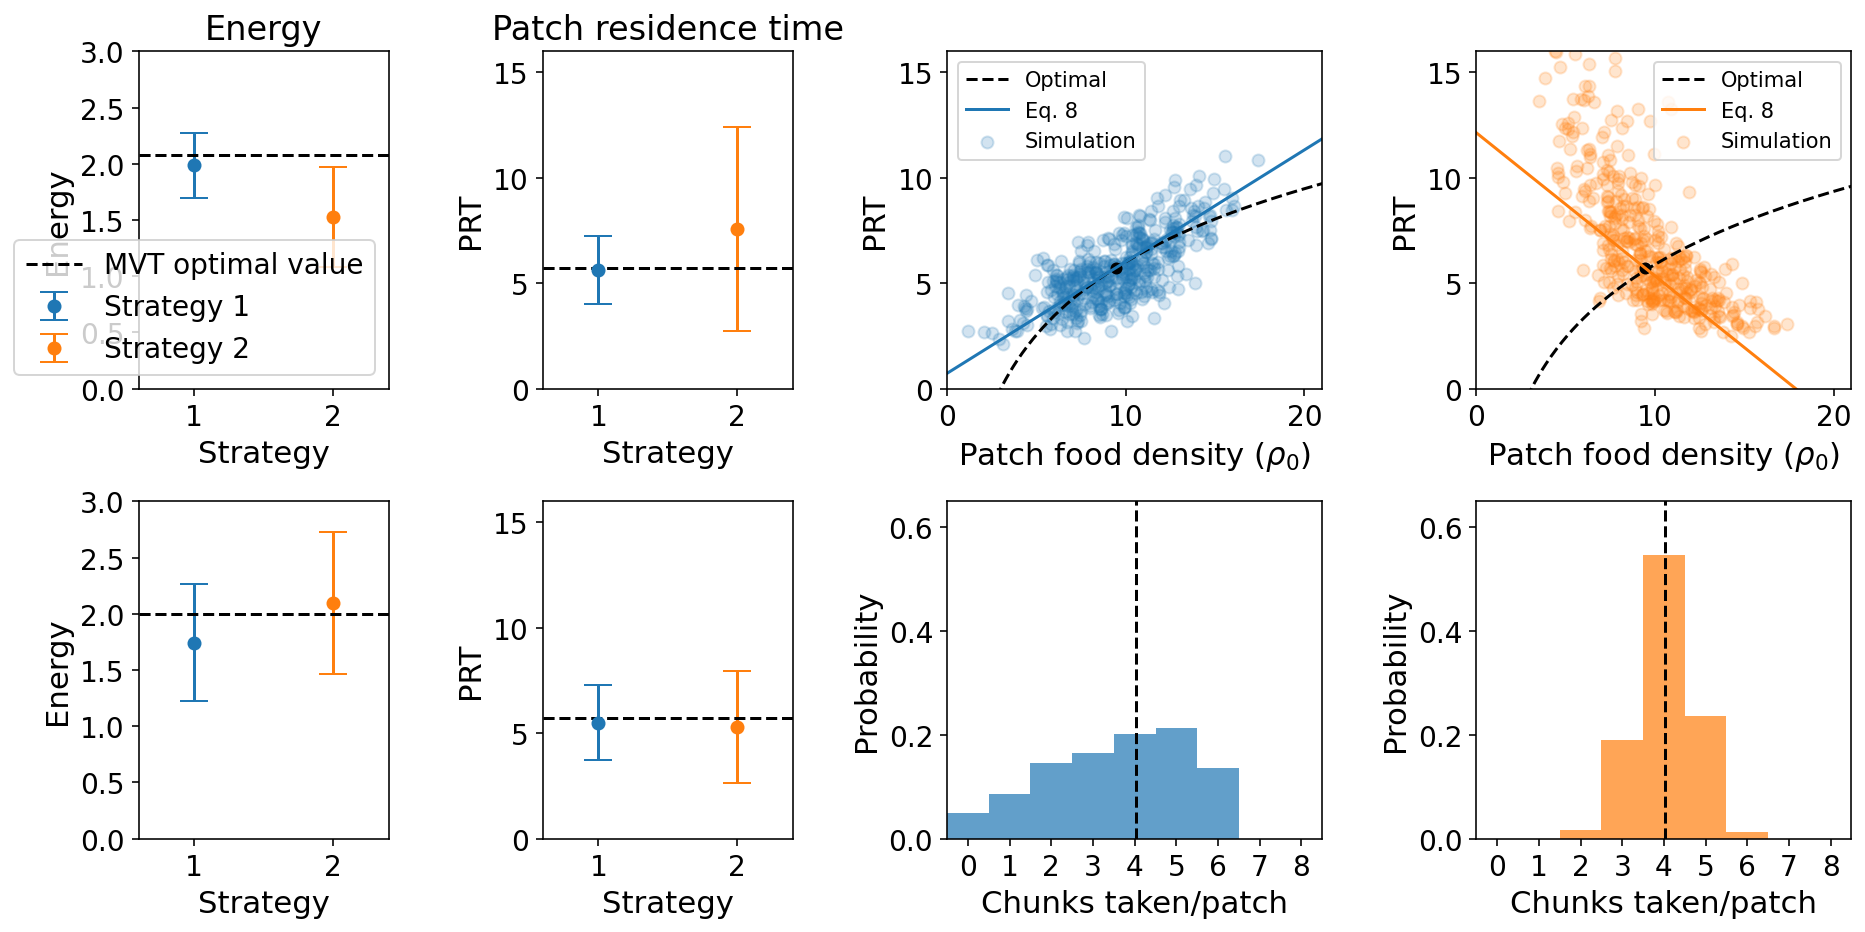

In [ ]:
tau_patch_values=[1.5,5]
Ttravelvalues=[1,5,10]
Evalues=[0.5,2,5]

# choose a certain case for these plots.  Note that some parts of the code below are not generalized to do other values
Enum=1
tpnum=1
Ttrnum=1
Evalue=Evalues[Enum]
tau_patch=tau_patch_values[tpnum]
Ttravel=Ttravelvalues[Ttrnum]
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
alphasize=sim.alpha_opt(Evalue,rho0,tau_patch)/rho0

sigmarhovalues=[0.3,0,0]
sigmatauPvalues=[0,0,0.3]
cvalues=[0,8,0]
Ttrsigmavalues=[0,1,0]
numenvs=3  # set this to 2 to make the figure in the main text.  Set to 3 and then shorten the loop to make the supplemental figure

totaltime=10000
sigmavalue = 0.3 # noise, used for all

alphachoicevalues=[1,-0.2,1.05*alphasize]
numstrategies = len(alphachoicevalues)

def makeblanklists():
    return [[[] for _ in range(numstrategies)] for _ in range(numenvs)]

grid_rho0 = makeblanklists()
grid_prts = makeblanklists()
grid_taupatch = makeblanklists()
grid_numfood = makeblanklists()
grid_traveltimes = makeblanklists()
grid_Eresults = makeblanklists()
grid_Tresults = makeblanklists()

for env in range(numenvs):
    print('env ',env)
    sigmarho = sigmarhovalues[env]
    sigmatauP = sigmatauPvalues[env]
    cvalue = cvalues[env]
    Ttrsigma = Ttrsigmavalues[env]

    for anum in range(numstrategies):
        alphachoice = alphachoicevalues[anum]
        Eresults, Tresults, prts, traveltimes, allrho0, alltaupatch, numfoodrewards = sim.modelsimulation(totaltime=totaltime, dt=sim.dt, # time in seconds
                            tau_E=sim.tau_E, Ttravel=Ttravel, rho0=rho0, tau_patch=tau_patch, 
                            beta=0, sigma=sigmavalue*rho0, sigma_rho0=sigmarho*rho0, sigma_taupatch=sigmatauP*tau_patch, 
                            sigma_Ttravel=Ttrsigma,
                            q=cvalue,
                            alphachoice=alphachoice)
        grid_Eresults[env][anum] = Eresults
        grid_Tresults[env][anum] = Tresults
        grid_prts[env][anum] = prts
        grid_traveltimes[env][anum] = traveltimes
        grid_rho0[env][anum] = allrho0
        grid_taupatch[env][anum] = alltaupatch
        grid_numfood[env][anum] = numfoodrewards
        
# make these arrays, and correct the optimal energy for the first environment  
grid_Eresults = np.array(grid_Eresults)
grid_Tresults = np.array(grid_Tresults)        
        

wratio = 1.5
gs_kw = dict(width_ratios=[1,1,wratio,wratio])
f,ax=plt.subplots(2,4,gridspec_kw=gs_kw)
f.set_size_inches((13,6.6))

envnames = np.arange(numenvs) + 1
lsize=14
s=sim.s  # this is needed for a few calculations below

for env in range(2):
    # Energy plot
    a=ax[env,0]
    for anum in range(2):
        a.errorbar(envnames[anum], grid_Eresults[env,anum,1], yerr=grid_Eresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
    if env==0:
        Eopt = 2.07689208  # manually entered value, from solution
    else:
        Eopt = 2      
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[1]+ew]
    a.plot(xopt,[Eopt,Eopt],'k--',label="MVT optimal value")
    
    a.set_xlim(xopt)
    a.set_ylim([0,3])
    a.set_xticks(envnames[0:2])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('Energy',fontsize=lsize*1.1)
    if env==0:
        a.legend(fontsize=lsize,loc=4)
        
    # Time of patch residence plot
    a=ax[env,1]
    for anum in range (2):
        a.errorbar(envnames[anum], grid_Tresults[env,anum,1], yerr=grid_Tresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[1]+ew]
    Topt = grid_Tresults[env,0,0]  # this the same for all
    a.plot(xopt,[Topt,Topt],'k--',label="MVT optimal")
    
    a.set_xlim(xopt)
    a.set_ylim([0,16])
    a.set_xticks(envnames[0:2])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)

[[a.set_xlabel('Strategy',fontsize=lsize*1.1) for a in ax[r,:]] for r in range(2)]
ax[0,0].set_title('Energy',fontsize=lsize*1.2)
ax[0,1].set_title('Patch residence time',fontsize=lsize*1.2)


env=0
Topt = grid_Tresults[env,0,0]
for anum in range(2):
    a = ax[env,anum+2]

    # opt
    rho=np.arange(0.001,22,0.1)    
    a.plot(rho,tau_patch*np.log(rho/(Eopt+s)),'k--',label="Optimal")
    
    # model calculation
    alpha = alphachoicevalues[anum]*rho0
   
    numpoints=425
    a.scatter(grid_rho0[env][anum][-numpoints:],grid_prts[env][anum][-numpoints:],c=snscolors[anum],alpha=0.2,label="Simulation")#,rasterized=True)
    
    Eopt = 2.07689208  # value taken from the solution
    model_dT = tau_patch*(Eopt+s-rho0)/( rho0*(Eopt+s-alpha)) * (rho-rho0)
    a.plot(rho,Topt+model_dT,c=snscolors[anum],label="Eq. 8") 
    
    Topt = grid_Tresults[env,0,0]
    a.scatter([rho0],[Topt],marker='o',s=25,color='k')#,label='$\\rho_0$')
    
    # format and labels    
    a.set_ylim([0,16])
    a.set_xlim([0,21])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)
    a.set_xlabel('Patch food density ($\\rho_0$)',fontsize=1.1*lsize)
    a.legend(fontsize=lsize*0.75)


env=1
Topt = grid_Tresults[env,0,0]
optnumfood = - sim.eta_opt(E=2,rho0=rho0,tau_patch=tau_patch,alpha=0)/cvalues[env]
for anum in range(2):
    a = ax[env,anum+2]
    a.hist(grid_numfood[env][anum],bins=np.arange(0,10)-0.5,density=True,color=snscolors[anum],alpha=0.7)
    # opt
    a.plot([optnumfood,optnumfood],[0,1],'k--')
    # format and labels
    a.set_ylim([0,0.65])
    a.set_xlim([-0.5,8.5])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('Probability',fontsize=lsize*1.1)    
    a.set_xlabel('Chunks taken/patch',fontsize=1.1*lsize)    
    a.set_xticks(np.arange(0,9))
        
plt.subplots_adjust(wspace=0.15,hspace=0.5)
f.tight_layout()
#plt.savefig('fig3-strategies-correlation-only2.pdf')
plt.show()    

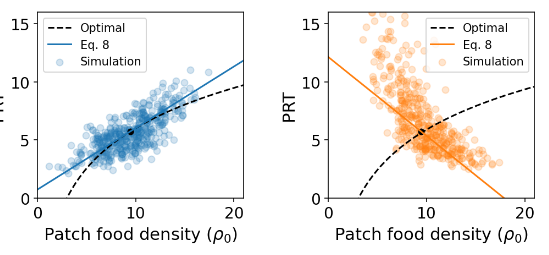

Looking at these two plots, the y-axis depicts the amount that you’ve stayed within the patch as a function of the patch food density. The marginal value theorem is depicted or predicted by the dotted line. 
 
In the blue plot, the MVT indicates that you should stay in high quality patches or abundant patches for longer. This happens because it takes you longer to deplete the resources. In terms of the increment-decrement strategy, food pushes you away from the boundary so if you are in a high quality patch you may not know the quality of the patch but you are receiving more food reward so you are likely to stay longer. 
 
In a decremental strategy (the yellow plot), where receiving food pushes you towards the threshold, we see the opposite trend. If you are in a high quality patch, you are spending less time in that patch because it takes you less time to gain the same amount of rewards. 


## Conclusions
In this project, I've demonstrated the use of the foraging drift diffusion model and through that I've established what an optimal patch-leaving strategy looks like in a continuous environment. In Section 3, I concluded that density adaptive strategy or increment-decrement strategy is optimal meaning that it has a higher energy intake than a decremental strategy. This aligns with my hypothesis that the optimal strategy in a continuous environment would be one that resembles the marginal value theory. 
 
Although and beyond the scope of what I set out to do, in a discrete environment the decremental strategy is most optimal. This is because the environment is known to you and you are aware of the fact that each patch has a limited number of reward. 
